In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data=pd.read_csv('Wine_clust.csv')

In [121]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [122]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [123]:
data1=data.iloc[:,[3,4]].values

In [124]:
type(data1)

numpy.ndarray

In [125]:
data.shape

(178, 13)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


# Kmeans clustering

In [127]:
from sklearn.cluster import KMeans

In [128]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++', random_state = 42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [129]:
wcss

[38080.13780898876,
 15481.412287933093,
 9047.549896539735,
 5956.8148745015405,
 4767.219739463602,
 3944.450773557808,
 3375.9864465915584,
 2833.60211671037,
 2483.5445398603006,
 2271.5598296083763,
 2063.012005286318,
 1871.7293987432515]

# plotting number of clusters vs wcss

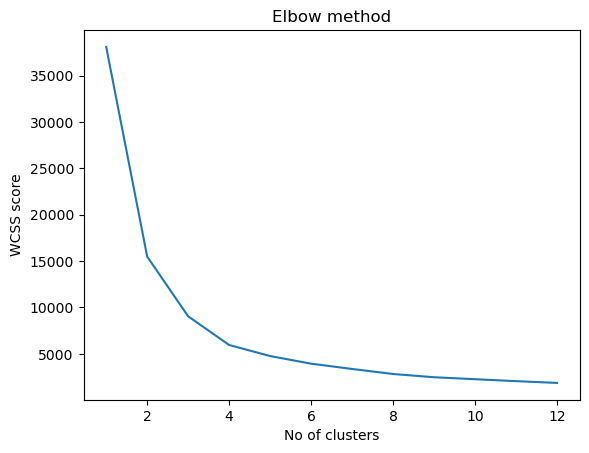

In [130]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.show()

In [131]:
#kmeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data1)

In [132]:
y_kmeans

array([4, 0, 0, 3, 4, 3, 0, 4, 0, 0, 3, 0, 2, 0, 0, 3, 4, 4, 3, 4, 4, 0,
       0, 0, 0, 4, 0, 0, 3, 0, 0, 3, 3, 1, 3, 0, 3, 0, 0, 4, 4, 2, 0, 3,
       3, 3, 0, 0, 3, 3, 0, 0, 3, 4, 4, 4, 4, 0, 3, 2, 0, 0, 0, 2, 3, 0,
       2, 2, 3, 1, 3, 2, 2, 1, 0, 0, 2, 3, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 0, 4, 0, 2, 2, 2, 2, 2, 2, 2, 4, 3,
       0, 3, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2, 2, 0, 3, 4, 3, 4, 0,
       3, 0, 2, 0, 0, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 2, 2, 0, 0, 4,
       4, 0])

In [133]:
print(y_kmeans)

[4 0 0 3 4 3 0 4 0 0 3 0 2 0 0 3 4 4 3 4 4 0 0 0 0 4 0 0 3 0 0 3 3 1 3 0 3
 0 0 4 4 2 0 3 3 3 0 0 3 3 0 0 3 4 4 4 4 0 3 2 0 0 0 2 3 0 2 2 3 1 3 2 2 1
 0 0 2 3 1 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 1 1 2 2 2 0 2 0 2 2 2 2 2 0 0 3
 2 3 2 2 2 2 3 2 2 0 4 0 2 2 2 2 2 2 2 4 3 0 3 2 0 2 0 2 0 0 2 0 0 3 0 2 2
 0 3 4 3 4 0 3 0 2 0 0 2 2 3 3 3 2 2 3 2 3 3 0 2 2 0 0 4 4 0]


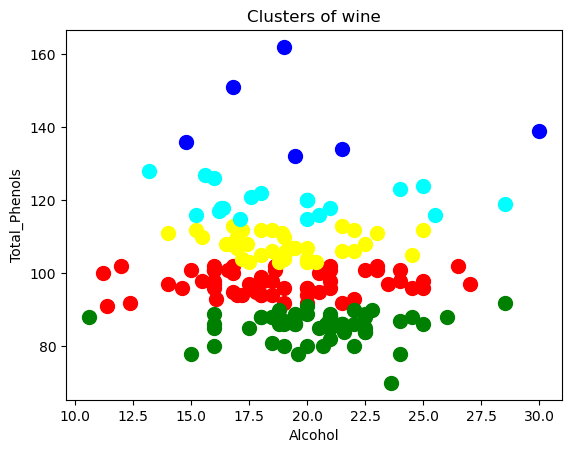

In [134]:
plt.scatter(data1[y_kmeans==0,0],data1[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(data1[y_kmeans==1,0],data1[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(data1[y_kmeans==2,0],data1[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(data1[y_kmeans==3,0],data1[y_kmeans==3,1],s=100,c='yellow',label='Cluster4')
plt.scatter(data1[y_kmeans==4,0],data1[y_kmeans==4,1],s=100,c='cyan',label='Cluster5')
plt.title('Clusters of wine')
plt.xlabel('Alcohol')
plt.ylabel('Total_Phenols')
plt.show()

# Plotting Dengrogram to find the optimum number of clusters

In [135]:
import scipy.cluster.hierarchy as sch

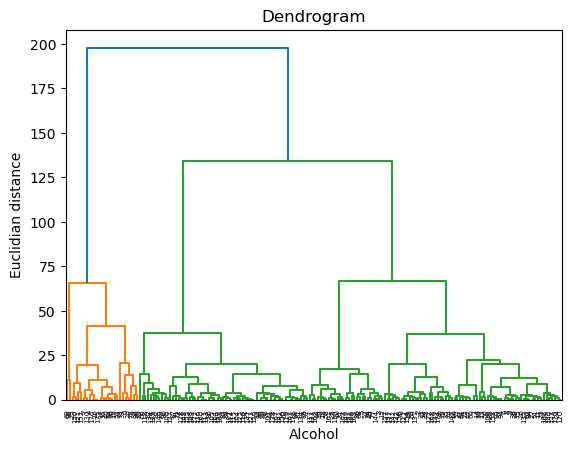

In [136]:
dendrogram=sch.dendrogram(sch.linkage(data1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Alcohol')
plt.ylabel('Euclidian distance')
plt.show()

In [137]:
from sklearn.cluster import AgglomerativeClustering

In [138]:
hc = AgglomerativeClustering(n_clusters = 8,affinity='euclidean',linkage='ward')

In [139]:
y_hc = hc.fit_predict(data1)

In [140]:
y_hc

array([2, 0, 1, 7, 5, 7, 0, 5, 0, 0, 7, 0, 3, 0, 0, 7, 5, 5, 7, 5, 2, 1,
       0, 0, 0, 5, 0, 0, 7, 0, 1, 7, 1, 2, 7, 1, 7, 0, 0, 2, 5, 3, 0, 1,
       7, 7, 0, 0, 1, 7, 0, 0, 7, 5, 5, 5, 5, 0, 7, 0, 0, 0, 0, 3, 1, 0,
       6, 6, 7, 4, 1, 3, 3, 2, 1, 0, 3, 7, 2, 1, 3, 3, 6, 3, 0, 0, 3, 3,
       3, 6, 6, 3, 6, 3, 0, 4, 2, 3, 3, 3, 0, 3, 0, 3, 3, 3, 6, 3, 3, 0,
       7, 3, 1, 3, 3, 3, 3, 7, 6, 3, 0, 5, 1, 3, 6, 3, 3, 3, 3, 6, 5, 1,
       1, 7, 3, 0, 3, 1, 3, 1, 0, 3, 1, 3, 7, 1, 6, 3, 3, 7, 5, 7, 5, 0,
       1, 3, 3, 1, 1, 3, 3, 7, 7, 7, 3, 3, 7, 3, 1, 7, 0, 3, 3, 0, 1, 5,
       5, 1], dtype=int64)

# silhoutte score

In [141]:
from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(data1,y_hc)
print(silhoutte_avg)

0.3961300183254588


In [142]:
hc1=AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward')

In [143]:
y_hc1 = hc1.fit_predict(data1)

In [144]:
y_hc1

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0], dtype=int64)

In [145]:
from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(data1,y_hc1)
print(silhoutte_avg)

0.47030670696825333


# PCA

In [146]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [147]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [148]:
df = pd.DataFrame(df['data'],columns = df['feature_names'])
#df = pd.DataFrame(df.data,columns=[df.feature_names])


In [149]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [162]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [163]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [165]:
scaled_data1 = sc.fit_transform(df)

In [166]:
scaled_data1

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [169]:
scaled_data1 = pd.DataFrame(scaled_data1,columns=df.columns)

In [170]:
scaled_data1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [171]:
from sklearn.decomposition import PCA

In [172]:
pca = PCA(n_components=10)
pca.fit(scaled_data1)
x_pca=pca.transform(scaled_data1)

In [173]:
x_pca.shape

(569, 10)

In [174]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [175]:
np.sum(pca.explained_variance_ratio_)

0.9515688143110788

In [180]:
pca1 = PCA(n_components=0.96)
pca1.fit(scaled_data1)
x_pca1=pca1.transform(scaled_data1)

In [181]:
x_pca.shape

(569, 10)

In [182]:
pca1.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719])

In [183]:
np.sum(pca1.explained_variance_ratio_)

0.9613660042126467